<a href="https://colab.research.google.com/github/iplfinal/CSKVSGT/blob/main/Logistics_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset_lab_3_3.csv to dataset_lab_3_3.csv


In [4]:
data = pd.read_csv('dataset_lab_3_3.csv') 
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


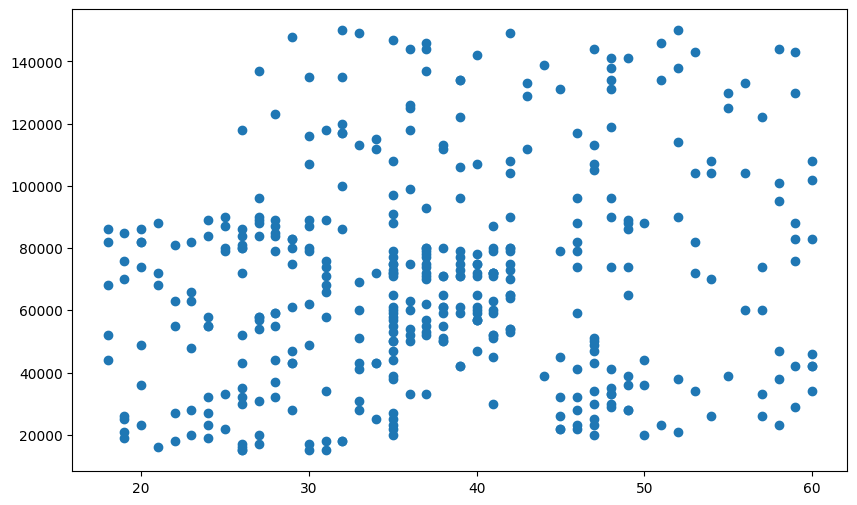

In [5]:
plt.scatter(data['Age'], data['EstimatedSalary'])
plt.show()
x = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)
print(X_train[0:10,:])

[[ 0.14929388  0.18369986]
 [ 1.00876826 -1.06004988]
 [ 0.81777395 -0.29010956]
 [ 1.10426541 -1.20811532]
 [-0.9011748   0.45021766]
 [ 1.00876826 -1.17850223]
 [-0.99667195 -0.43817501]
 [ 0.9132711  -1.44502003]
 [-0.71018049  1.39783651]
 [-1.85614632 -0.49740118]]


In [7]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_sk = lr_model.predict(X_test)
plt.clf()
print(f"Accuracy = {lr_model.score(X_test, y_test)}")

Accuracy = 0.81


<Figure size 1000x600 with 0 Axes>

<ipython-input-8-502e7a8a2124>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j, 0],x_set[y_set==j,1],c=ListedColormap(('red', 'green')) (i), label=j)


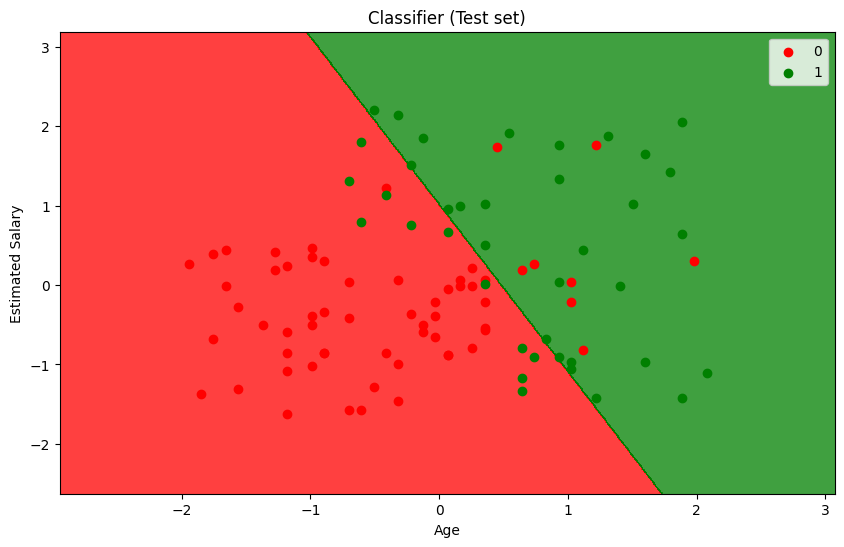

In [8]:
from matplotlib.colors import ListedColormap
x_set,y_set=X_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2, lr_model.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate (np.unique (y_set)):
    plt.scatter(x_set[y_set==j, 0],x_set[y_set==j,1],c=ListedColormap(('red', 'green')) (i), label=j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()